# Virtueller Taupunktsensor

In [1]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='6a2c2f45-a184-4ae6-a9d3-3a1e5ad4e537', project_access_token='p-d7bc36affb87b44b1b105d6290da63dfda68762b')
pc = project.project_context


## Instatiate project access

In [2]:
# @hidden_cell
# The project credentials
from project_lib import Project
project = Project (
    project_id = '6a2c2f45-a184-4ae6-a9d3-3a1e5ad4e537',
    project_access_token = 'p-d7bc36affb87b44b1b105d6290da63dfda68762b'
)

In [3]:
wetter_csv = project.get_file('Wetter-Linz-Hoersching.csv')

## Read into Pandas

In [4]:
import pandas as pd
wetter = pd.read_csv(wetter_csv, parse_dates=['DateTime [UTC]'])
wetter.head()

,DateTime [UTC],T,Td,ff,dd,P,Pstat,rF,rSD,RR
0,2016-12-31 23:00:00,-5.1,-5.5,1.11,135.0,1032.6,NaN,97.0,0.0,0.0
1,2017-01-01 00:00:00,-5.1,-5.5,0.56,NaN,1031.7,NaN,97.0,0.0,0.0
2,2017-01-01 01:00:00,-5.2,-5.7,1.11,315.0,1031.1,NaN,97.0,0.0,0.0
3,2017-01-01 02:00:00,-5.6,-6.1,1.11,315.0,1030.5,NaN,96.0,0.0,0.0
4,2017-01-01 03:00:00,-5.8,-6.3,1.11,270.0,1029.8,NaN,96.0,0.0,0.0


In [5]:
wetter = wetter.set_index('DateTime [UTC]')
wetter.head()

,T,Td,ff,dd,P,Pstat,rF,rSD,RR
DateTime [UTC],,,,,,,,,
2016-12-31 23:00:00,-5.1,-5.5,1.11,135.0,1032.6,NaN,97.0,0.0,0.0
2017-01-01 00:00:00,-5.1,-5.5,0.56,NaN,1031.7,NaN,97.0,0.0,0.0
2017-01-01 01:00:00,-5.2,-5.7,1.11,315.0,1031.1,NaN,97.0,0.0,0.0
2017-01-01 02:00:00,-5.6,-6.1,1.11,315.0,1030.5,NaN,96.0,0.0,0.0
2017-01-01 03:00:00,-5.8,-6.3,1.11,270.0,1029.8,NaN,96.0,0.0,0.0


In [6]:
wetter[['T', 'Td']].plot(figsize=(30,5), grid=True)

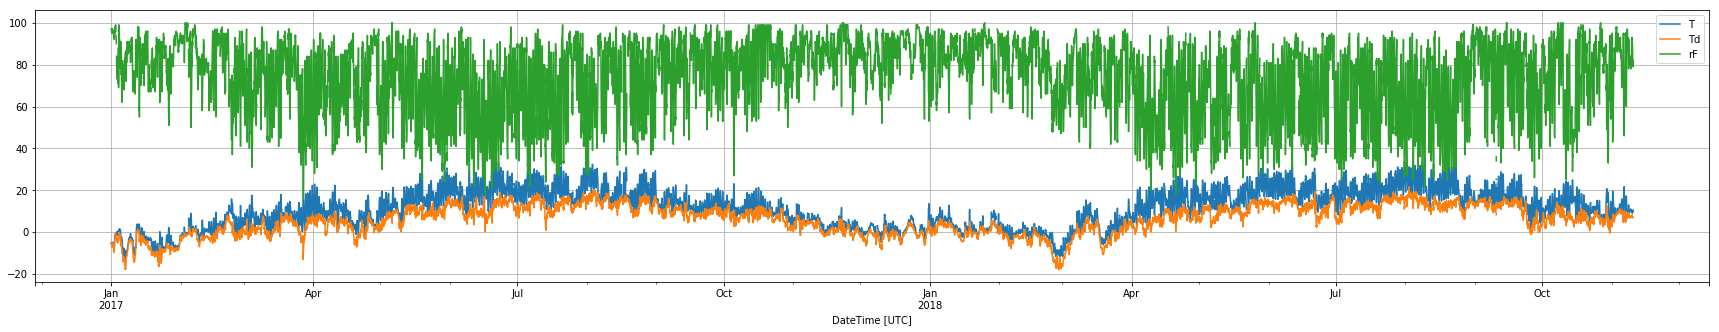

In [7]:
wetter[['T', 'Td','rF']].plot(figsize=(30,5), grid=True)

In [8]:
wetter.shape

(16288, 9)

Löschen der Spalte Pstat da sehr viele NaN

In [9]:
wetter = wetter.drop(columns=['Pstat'])
wetter.head()

,T,Td,ff,dd,P,rF,rSD,RR
DateTime [UTC],,,,,,,,
2016-12-31 23:00:00,-5.1,-5.5,1.11,135.0,1032.6,97.0,0.0,0.0
2017-01-01 00:00:00,-5.1,-5.5,0.56,NaN,1031.7,97.0,0.0,0.0
2017-01-01 01:00:00,-5.2,-5.7,1.11,315.0,1031.1,97.0,0.0,0.0
2017-01-01 02:00:00,-5.6,-6.1,1.11,315.0,1030.5,96.0,0.0,0.0
2017-01-01 03:00:00,-5.8,-6.3,1.11,270.0,1029.8,96.0,0.0,0.0


Mit dropna jene Zeilen löschen die NaN noch haben 

In [10]:
wetter = wetter.dropna()
wetter.describe()

,T,Td,ff,dd,P,rF,rSD,RR
count,14789.000000,14789.000000,14789.000000,14789.000000,14789.000000,14789.000000,14789.000000,14789.000000
mean,11.522733,6.144384,3.412167,202.312868,1017.305105,72.816147,25.156995,0.076361
std,9.262365,7.084319,2.212271,93.458123,7.764344,17.848484,39.925563,0.491036
min,-16.100000,-18.000000,0.000000,0.000000,986.800000,16.000000,0.000000,0.000000
25%,4.300000,0.900000,1.388889,90.000000,1012.800000,60.000000,0.000000,0.000000
50%,11.900000,7.100000,3.055556,225.000000,1017.200000,77.000000,0.000000,0.000000
75%,18.300000,11.800000,4.722222,270.000000,1021.900000,87.000000,50.000000,0.000000
max,35.600000,21.700000,23.333333,360.000000,1042.000000,100.000000,100.000000,19.200000


In [11]:
X = wetter[['T','P', 'rF']]
Y = wetter['Td']
X.head()

,T,P,rF
DateTime [UTC],,,
2016-12-31 23:00:00,-5.1,1032.6,97.0
2017-01-01 01:00:00,-5.2,1031.1,97.0
2017-01-01 02:00:00,-5.6,1030.5,96.0
2017-01-01 03:00:00,-5.8,1029.8,96.0
2017-01-01 05:00:00,-6.3,1028.9,96.0


In [12]:
Y.head()

DateTime [UTC]
2016-12-31 23:00:00   -5.5
2017-01-01 01:00:00   -5.7
2017-01-01 02:00:00   -6.1
2017-01-01 03:00:00   -6.3
2017-01-01 05:00:00   -6.8
Name: Td, dtype: float64

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr = LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
lr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
lr.coef_

array([ 0.95267614,  0.00237828,  0.2338594 ])

In [17]:
lr.intercept_

-24.281223677043389

In [25]:
y_manuell = X @ lr.coef_ + lr.intercept_
y_manuell

array([-3.99970001, -4.09853504, -4.71489187, ...,  6.83934806,
        6.69980496,  6.92456944])

In [26]:
y_pred = lr.predict(X)
y_pred

array([-3.99970001, -4.09853504, -4.71489187, ...,  6.83934806,
        6.69980496,  6.92456944])

Abweichung der Fehler muss nun 0 sein 

In [27]:
import numpy as np
np.max((y_manuell - y_pred)**2)

0.0

## Erzeugen eines neuen DataFrames für die Visualisierung

In [28]:
df = pd.DataFrame(
    index = X.index, 
    data = {
        'Td' : Y, 
        'Td_pred': y_pred
    }
)

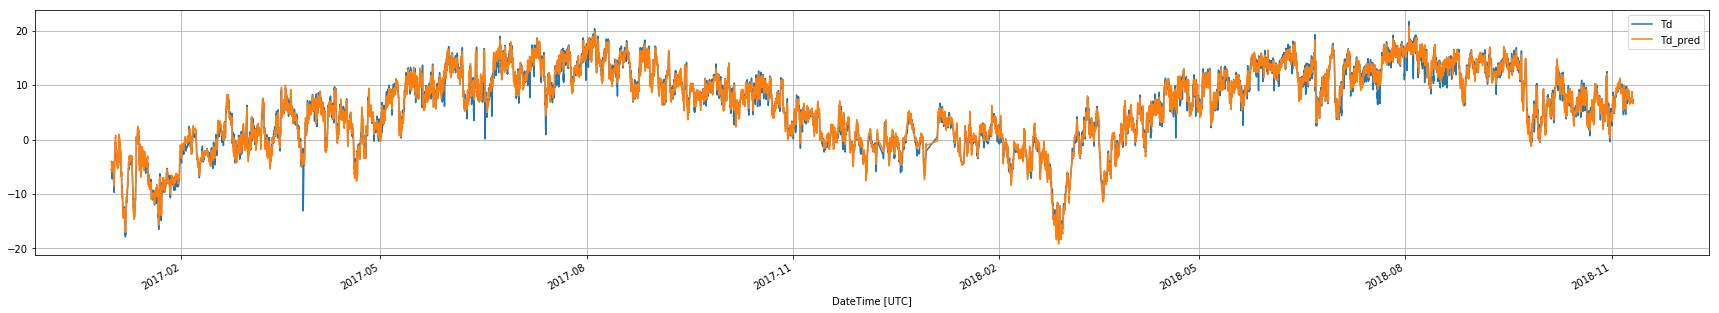

In [29]:
df.plot(figsize=(30,5), grid=True)

Abweichung feststellen 

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
np.sqrt(mean_squared_error(Y,y_pred))

0.82597226057237472

Abweichung maxmial 

In [32]:
np.max(np.abs(Y-y_pred))

9.7106580533973226

Abweichung minimal 

In [33]:
np.min(np.abs(Y-y_pred))

2.5049026894707893e-05

# Evaluierung des zukünftigen Verhaltens

In [34]:
from sklearn.model_selection import train_test_split

Aufteilen des Arrays in 40% Test und 60% Daten 
Achtung: hier lassen wir die Zeitreihe bestehen --> shuffle = False

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, shuffle=False)

In [36]:
X_train.shape, X_test.shape

((8873, 3), (5916, 3))

In [37]:
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

Fehler auf Trainingsdaten

In [41]:
np.sqrt(mean_squared_error(Y_train, y_pred_train))

0.77383535165715756

Fehler auf Testdaten

In [42]:
np.sqrt(mean_squared_error(Y_test, y_pred_test))

0.92935206955678296

# Kreuzvaledierung als Trainings & Testvariante

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

In [47]:
cross_val_score(lr, X, Y, cv=5)

array([ 0.97966285,  0.91082858,  0.9699849 ,  0.98752107,  0.95142668])

In [48]:
lr.score(X_test, Y_test)

0.98210856472692898

In [49]:
from sklearn.metrics import r2_score

In [50]:
r2_score(Y_test, y_pred_test)

0.98210856472692909

$$
R^2 = 1 - \frac{SS_{res}}{SS_{tot0}}
$$

$$
SS_{res} = \sum_i (\hat{y}_i - y_i)^2 
$$

$$
SS_{tot} = \sum_i (y_i - \bar{y})^2 
$$

$$
\bar{y} = \frac{1}{n} \sum_{i=1}^n y_i
$$

In [51]:
np.mean(cross_val_score(lr, X, Y, cv=5))

0.95988481452294216

In [56]:
MSE_CV = cross_val_score(lr, X, Y, cv=10, scoring=make_scorer(mean_squared_error))
MSE_CV

array([ 0.66850119,  0.61756736,  1.24750046,  0.54119621,  0.4443481 ,
        0.57359107,  0.71990232,  0.86035054,  1.45222735,  0.36765923])

In [58]:
RMSE_CV = np.mean(np.sqrt(MSE_CV))
RMSE_CV

0.84674565762805065

In [59]:
lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
lr.coef_, lr.intercept_

(array([ 0.95267614,  0.00237828,  0.2338594 ]), -24.281223677043389)

Funktion für die Berechnung am Rasperry PI

Td = T * 0.95267614 + P*0.00237828 + rF * 0.2338594 -24.281223677043389